# PLSR - QualityAndTechnology

In [1]:
import numpy as np

In [2]:
X_height = np.mat([[195, 45], [185, 30], [156, 90], [181, 45], [164, 30], [158, 0], [185, 15], [186, 105], [187, 45]])
X_height

matrix([[195,  45],
        [185,  30],
        [156,  90],
        [181,  45],
        [164,  30],
        [158,   0],
        [185,  15],
        [186, 105],
        [187,  45]])

In [3]:
Y_weight = np.mat([[95, 44], [74, 43], [63, 36], [80, 45], [70, 40], [55, 38], [89, 44], [78, 45], [91, 43]])
Y_weight

matrix([[95, 44],
        [74, 43],
        [63, 36],
        [80, 45],
        [70, 40],
        [55, 38],
        [89, 44],
        [78, 45],
        [91, 43]])

In [4]:
import matplotlib.pyplot as plt

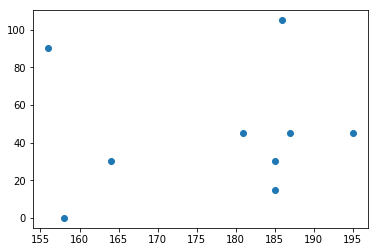

In [5]:
plt.plot(X_height[:,0], X_height[:,1], 'o') # Scatter Plot

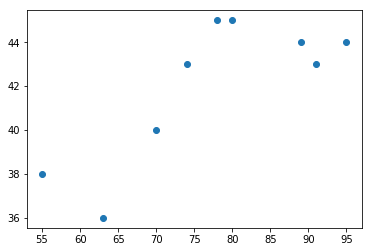

In [6]:
plt.plot(Y_weight[:,0], Y_weight[:,1], 'o') # Scatter Plot

In [7]:
import pandas as pd

In [8]:
df_X_height = pd.DataFrame(X_height)
df_X_height

,0,1
0,195,45
1,185,30
2,156,90
3,181,45
4,164,30
5,158,0
6,185,15
7,186,105
8,187,45


In [9]:
df_X_height.cov()

,0,1
0,202.277778,35.625
1,35.625000,1125.000


In [10]:
df_X_height.corr()

,0,1
0,1.00000,0.07468
1,0.07468,1.00000


In [11]:
import math

In [12]:
35.625 / math.sqrt(202.277778 * 1125.000)

0.07468003703301729

In [13]:
import statsmodels.api as sm

In [14]:
df_X_height_const = sm.add_constant(df_X_height)
df_X_height_const

,const,0,1
0,1.0,195,45
1,1.0,185,30
2,1.0,156,90
3,1.0,181,45
4,1.0,164,30
5,1.0,158,0
6,1.0,185,15
7,1.0,186,105
8,1.0,187,45


In [45]:
df_X_height_const.loc[:,['const',0]]

,const,0
0,1.0,195
1,1.0,185
2,1.0,156
3,1.0,181
4,1.0,164
5,1.0,158
6,1.0,185
7,1.0,186
8,1.0,187


In [46]:
model = sm.OLS(df_X_height_const.loc[:,1], df_X_height_const.loc[:,['const',0]])

In [49]:
results = model.fit()
results.params

const    13.748627
0         0.176119
dtype: float64

In [16]:
## 연습
Y = [1,3,4,5,2,3,4] # list
X = range(1,8)

X = sm.add_constant(X)
X # np.ndarray

model = sm.OLS(Y,X)

results = model.fit()

results.params

type(X)

Y = np.asarray(Y)
type(Y)

Y_hat = [2.14285714+0.25*x for x in X[:,1]]

plt.plot(Y, Y_hat, 'o')

In [52]:
w = np.linalg.lstsq(X, Y)[0] # least squares
w # array([ 2.14285714,  0.25      ])

array([ 2.14285714,  0.25      ])

In [54]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ Y
w # array([ 2.14285714,  0.25      ])

array([ 2.14285714,  0.25      ])

In [67]:
import sklearn
from sklearn.linear_model import LinearRegression

X1 = X[:,1]

lr = LinearRegression()
lr.fit(X1.reshape(-1,1), Y.reshape(-1,1))

lr.coef_, lr.intercept_